# Logistic Regression

**Sources**
https://towardsdatascience.com/predicting-customer-churn-using-logistic-regression-c6076f37eaca

## Libraries

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#gives you more than sklearn (also likelihood)
#import statsmodel.api as sm
#X, y = load_iris(return_X_y=)
#logit_model = sm.Logit(y, X)

## Import Data 

In [4]:
def load_original_data():
    return pd.read_csv("data/DATA_Customer-Churn.csv" )

In [5]:
churn_df= load_original_data()

In [6]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [7]:
churn_df.shape

(7043, 16)

In [8]:
# check data types of columns
churn_df.dtypes 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#convert TotalCharges dtype
churn_df["TotalCharges"] = pd.to_numeric(churn_df["TotalCharges"], downcast="float", errors='coerce')

#or df['DataFrame Column'] = df['DataFrame Column'].astype(float)

In [10]:
churn_df["TotalCharges"].dtypes

dtype('float32')

In [11]:
#check null values 
churn_df.isnull().values.any()

True

In [12]:
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#replace NaNs
churn_df=churn_df.dropna()

In [14]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
X = churn_df[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.850000
1,34,0,56.95,1889.500000
2,2,0,53.85,108.150002
3,45,0,42.30,1840.750000
4,2,0,70.70,151.649994
...,...,...,...,...
7038,24,0,84.80,1990.500000
7039,72,0,103.20,7362.899902
7040,11,0,29.60,346.450012
7041,4,1,74.40,306.600006


In [16]:
# Encode target valuable "Churn" with Encode or change into binary (0=No, 1=yes)
    #df.churn.replace({"Yes":1, "No":0}, inplace = True)

churn_df["Churn"] = pd.get_dummies(churn_df["Churn"])
churn_df["Churn"]

0       1
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: Churn, Length: 7032, dtype: uint8

In [17]:
#y = churn_df["Churn"]

y = churn_df.Churn.values
y

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [18]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Standardize & Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

trans = PowerTransformer()
#scaler = StandardScaler()

trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [19]:
X_train.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.857637,-0.436924,-0.180413,-0.609535
1,0.001767,-0.436924,-0.079652,0.117922
2,-1.377081,-0.436924,0.195859,-1.081404
3,-1.004116,-0.436924,0.314734,-0.631493
4,1.220783,-0.436924,-0.117596,0.913846


## Apply Logistic Regression 

In [20]:
# Fit the model 
model = LogisticRegression()    # model

model.fit(X_train.to_numpy(), y_train)   # model train

y_pred = model.predict(X_test.to_numpy())   # model prediction
y_pred_train = model.predict(X_train.to_numpy())

In [21]:
y_pred_train

array([1, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [22]:
model.score(X_test, y_test)

0.7848341232227488

## Model Validation w/c Resampling

**How many times was the classifier correct on the training set?**
Because we’re trying to predict whether a customer will leave or not, what better way to check our model performance than to see how often it was correct! To do so, we will take the residual distance between actual training data and predicted training data, as well as actual test data and predicted test data.

In [23]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train, y_pred_train)

# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residuals).value_counts())

# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residuals).value_counts(normalize = True))

1    3614
0    1308
dtype: int64
1    0.734254
0    0.265746
dtype: float64


Conclusion: This is an ok result! On our first pass, an 73% correct rate is an ok result. Remember, 100% accuracy would actually be a problem, as our model would be completely overfit to our data. 

Let’s check our test data (perform the same code block as above, using y_test and y_hat_test as the residual arguments.

In [24]:
# Find residual differences between test data and predicted train data
residuals = np.abs(y_test, y_pred)

# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residuals).value_counts())

# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residuals).value_counts(normalize = True))

1    1549
0     561
dtype: int64
1    0.734123
0    0.265877
dtype: float64


Conclusion: Again, positive results! Our test and train set sizes are different, so the normalized results are more meaningful here. The fact that our model performs about the same on our train and test sets is a positive sign that our model is performing well.

## Confusion Matrix (another Validation Method) 

A confusion matrix is an extremely strong method of evaluating the performance of our classifier. A confusion matrix is a visual representation which tells us the degree of four important classification metrics:

**True Positives (TP):** The number of observations where the model predicted the customer would churn (1), and they actually do churn (1)

**True Negatives (TN):** The number of observations where the model predicted the customer would not churn (0), and they actually do not churn (0).

**False Positives (FP):** The number of observations where the model predicted the customer will churn (1), but in real life they do not churn (0).

**False Negatives (FN):** The number of observations where the model predicted the customer will not churn (0), but in real life they do churn (1).

Explanation:

Precision (TP/PP): “Out of all the times the model said the customer would churn, how many times did the customer actually churn?

Recall TP/(TP+FN): “Out of all customers we saw that actually churn, what percentage of them did our model correctly identify as ‘going to churn?

Accuracy (TP+TN)/(TP+FP+TN+FN): “Out of all predictions made, what percentage were correct?
----------------------------------------------------


,Error_metric,Train,Test
0,Accuracy,1.0,1.0
1,Precision,1.0,1.0
2,Recall,1.0,1.0


Confusion matrix for the train set
[[1308    0]
 [   0 3614]]


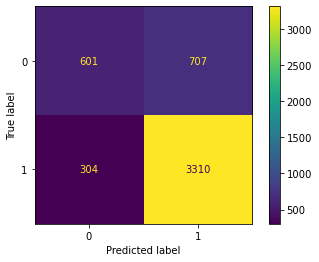



Confusion matrix for the test set
[[ 561    0]
 [   0 1549]]


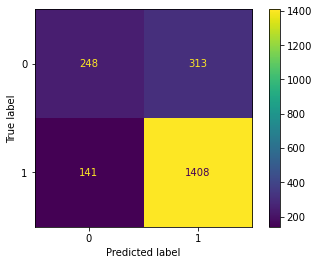

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print("Explanation:")
print()
print("Precision (TP/PP): “Out of all the times the model said the customer would churn, how many times did the customer actually churn?")
print()
print("Recall TP/(TP+FN): “Out of all customers we saw that actually churn, what percentage of them did our model correctly identify as ‘going to churn?")
print()
print("Accuracy (TP+TN)/(TP+FP+TN+FN): “Out of all predictions made, what percentage were correct?")
print("----------------------------------------------------")

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()

For our purposes of churn, it is worse for us to predict a customer not churning when that customer actually churns in reality, meaning that our False Negatives are more important to pay attention to.

In [23]:
from sklearn.metrics import confusion_matrix

# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 561,    0],
       [   0, 1549]])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

print("Precision")
print("Train:", precision_train)
print("Test:", precision_test)

print("Recall")
print("Train:", recall_train)
print("Test:", recall_test)
      
print("Accuracy")
print("Train:", accuracy_train)
print("Test:", accuracy_test)


Precision
Train: 1.0
Test: 1.0
Recall
Train: 1.0
Test: 1.0
Accuracy
Train: 1.0
Test: 1.0


## How to deal with imbalanced data 

In [25]:
#Check imbalance

In [26]:
churn_df['Churn'].value_counts()

1    5163
0    1869
Name: Churn, dtype: int64

In [27]:
print("Rate of customers who did not change turn:")
5163/len(churn_df['Churn'])

Rate of customers who did not change turn:


0.7342150170648464

## Resampling strategies

### Downsampling

In [28]:
category_0 = churn_df[churn_df['Churn'] == 0]
category_1 = churn_df[churn_df['Churn'] == 1]

In [29]:
category_0.shape

(1869, 16)

In [30]:
category_1.shape

(5163, 16)

In [31]:
#take higher value (here "category_1") and reduce it randomly to the length of category_0
category_1_down = category_1.sample(len(category_0,)) 

In [34]:
#concat the downsampled dataframe with the lower category
data_down = pd.concat([category_1_down, category_0], axis=0)

#shuffle data
data_down = data_down.sample(frac=1)
data_down['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [36]:
#check new df length
data_down.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
283,Female,0,No,No,68,Yes,Yes,No,No,No,No,No,Month-to-month,54.45,3687.750000,1
2303,Male,0,No,No,2,Yes,Yes,No,No,No,No,No,Month-to-month,47.80,92.449997,0
2061,Male,0,Yes,Yes,7,Yes,No,No,Yes,No,No,No,Month-to-month,48.70,340.250000,0
2237,Male,0,Yes,Yes,27,No,No,Yes,Yes,No,No,Yes,One year,45.85,1246.400024,1
3888,Female,0,No,No,1,Yes,No,No,No,No,No,Yes,Month-to-month,80.15,80.150002,0


In [41]:
#concat dataset 

X = data_down[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]

y = data_down.Churn.values

In [42]:
## Standardize & Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

trans = PowerTransformer()
#scaler = StandardScaler()

trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

#apply model # Fit the model 
model = LogisticRegression()    # model

model.fit(X_train.to_numpy(), y_train)   # model train

y_pred = model.predict(X_test.to_numpy())   # model prediction
y_pred_train = model.predict(X_train.to_numpy())

,Error_metric,Train,Test
0,Accuracy,0.726300,0.755793
1,Precision,0.727136,0.740741
2,Recall,0.733737,0.767824


Confusion matrix for the train set
[[930 364]
 [352 970]]


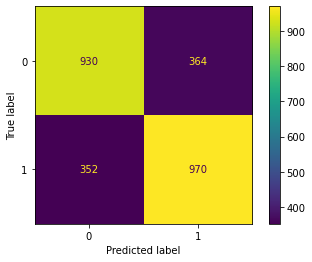



Confusion matrix for the test set
[[428 147]
 [127 420]]


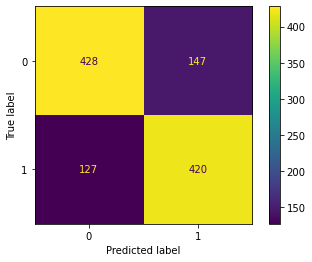

In [44]:
#check accuracy 

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()


## Upsampling Evaluation 

In [28]:
category_0 = churn_df[churn_df['Churn'] == 0]
category_1 = churn_df[churn_df['Churn'] == 1]


In [29]:
category_0.shape


(1869, 16)

In [30]:
category_1.shape

(5163, 16)

In [31]:
category_0_up = category_0.sample(len(category_1), replace=True)
print(category_0_up.shape)

(5163, 16)


In [32]:
data_up = pd.concat([category_0_up, category_1], axis=0)
#shuffling the data
data_up = data_up.sample(frac=1)
data_up['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [33]:
data_up.shape

(10326, 16)

In [34]:
#concat dataset 

X = data_up[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]

y = data_up.Churn.values
y

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [35]:
## Standardize & Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

trans = PowerTransformer()
#scaler = StandardScaler()

trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

#apply model # Fit the model 
model = LogisticRegression()    # model

model.fit(X_train.to_numpy(), y_train)   # model train

y_pred = model.predict(X_test.to_numpy())   # model prediction
y_pred_train = model.predict(X_train.to_numpy())

### Accuracy

In [36]:
model.score(X_test, y_test)

0.7327307940606843

,Error_metric,Train,Test
0,Accuracy,0.734920,0.732731
1,Precision,0.739082,0.734036
2,Recall,0.728477,0.724496


Confusion matrix for the train set
[[2672  932]
 [ 984 2640]]


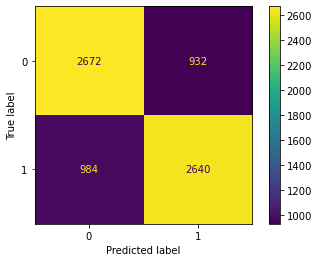



Confusion matrix for the test set
[[1155  404]
 [ 424 1115]]


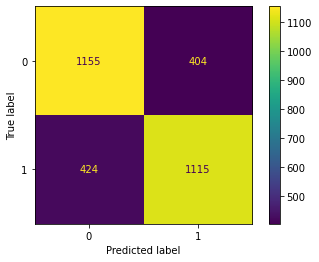

In [37]:
#check accuracy 

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()